<a href="https://colab.research.google.com/github/dsamanuel/Data-Science/blob/main/Linear_Regression_env_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore Dataset

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('ad_viz_plotval_data.csv')
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 41212 entries, 0 to 55015
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            41212 non-null  datetime64[ns]
 1   Source                          41212 non-null  object        
 2   Site ID                         41212 non-null  int64         
 3   POC                             41212 non-null  int64         
 4   Daily Mean PM2.5 Concentration  41212 non-null  float64       
 5   Units                           41212 non-null  object        
 6   Daily AQI Value                 41212 non-null  int64         
 7   Local Site Name                 41212 non-null  object        
 8   Daily Obs Count                 41212 non-null  int64         
 9   Percent Complete                41212 non-null  float64       
 10  AQS Parameter Code              41212 non-null  int64         
 11  AQS Par

,Date,Site ID,POC,Daily Mean PM2.5 Concentration,Daily AQI Value,Daily Obs Count,Percent Complete,AQS Parameter Code,Method Code,CBSA Code,State FIPS Code,County FIPS Code,Site Latitude,Site Longitude
count,41212,4.121200e+04,41212.000000,41212.000000,41212.000000,41212.000000,41212.000000,41212.000000,41212.000000,41212.000000,41212.0,41212.000000,41212.000000,41212.000000
mean,2024-06-19 19:22:06.720372992,6.058463e+07,2.679632,7.757660,37.410948,1.002038,100.203824,88180.057677,288.975250,34239.974765,6.0,58.303164,36.193672,-119.618889
min,2024-01-01 00:00:00,6.001001e+07,1.000000,-22.100000,0.000000,1.000000,100.000000,88101.000000,143.000000,12540.000000,6.0,1.000000,32.650900,-124.203470
25%,2024-03-20 00:00:00,6.031000e+07,2.000000,4.000000,22.000000,1.000000,100.000000,88101.000000,170.000000,25260.000000,6.0,31.000000,34.210169,-121.247874
50%,2024-06-17 00:00:00,6.061200e+07,3.000000,6.500000,36.000000,1.000000,100.000000,88101.000000,170.000000,40140.000000,6.0,61.000000,36.209286,-119.691218
75%,2024-09-15 00:00:00,6.077300e+07,3.000000,10.000000,53.000000,1.000000,100.000000,88101.000000,209.000000,41500.000000,6.0,77.000000,37.814781,-118.188930
max,2024-12-31 00:00:00,6.113100e+07,23.000000,372.100000,593.000000,2.000000,200.000000,88502.000000,810.000000,49700.000000,6.0,113.000000,41.756130,-115.483070
std,NaN,2.929932e+05,1.841419,6.396899,20.232681,0.045101,4.510140,159.538804,224.122432,10289.644773,0.0,29.310271,2.156878,1.893389


# Average monthly AQI Value


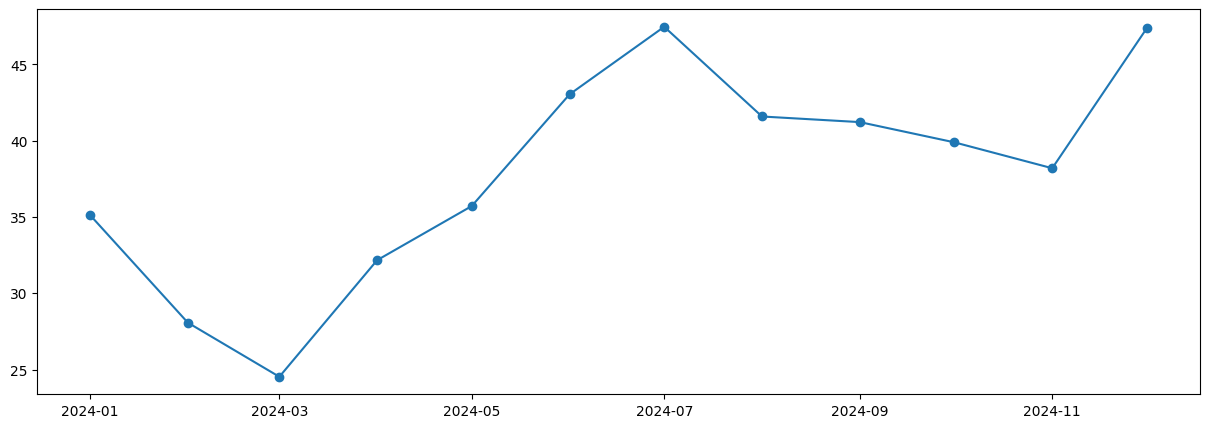

In [ ]:

df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['newdate'] = pd.to_datetime(dict(year=df.year, month=df.month, day=1))
df1 = df[['newdate','Daily AQI Value']]

df1 =  df.groupby(df['newdate'])['Daily AQI Value'].mean().reset_index(name ='Avg_DAV')
x = df1['newdate']
y = df1['Avg_DAV']


plt.figure(figsize=[15,5])

plt.plot(x, y, marker = 'o')


# Daily AQI  Vs. Daily Mean PM2.5 Conc



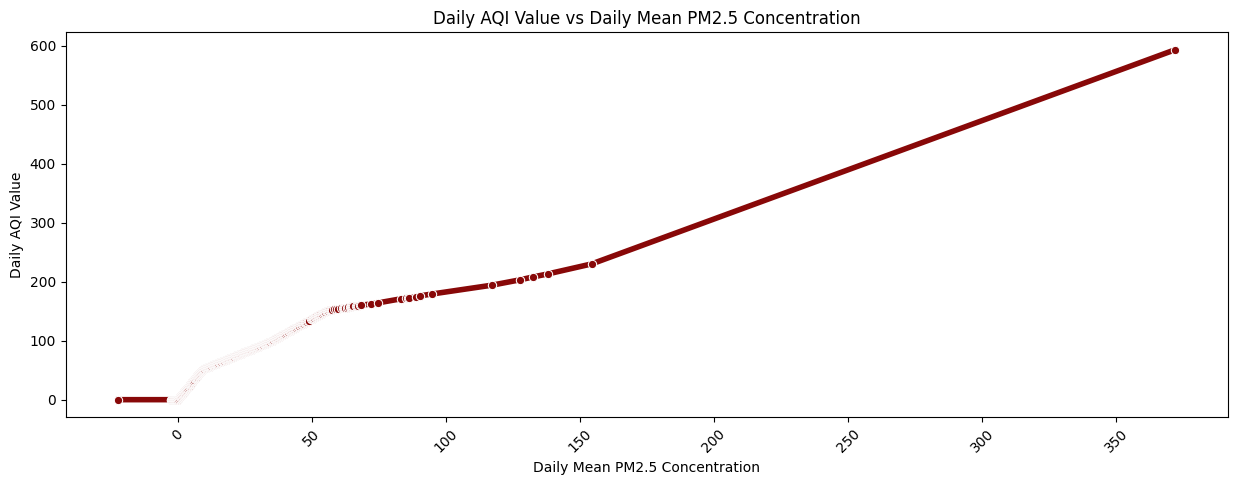

In [ ]:

plt.figure(figsize=[15,5])
sns.lineplot(y='Daily AQI Value', x='Daily Mean PM2.5 Concentration', data=df, marker ='o', linewidth = 4, color = mcolor.hex2color('#880808'))
plt.xlabel('Daily Mean PM2.5 Concentration')
plt.ylabel('Daily AQI Value')
plt.title('Daily AQI Value vs Daily Mean PM2.5 Concentration')
plt.xticks(rotation=45)
plt.show()

# Regression

r2 = 0.8596233035060554, m = 2.9325002384246677, b = 14.661607323681475


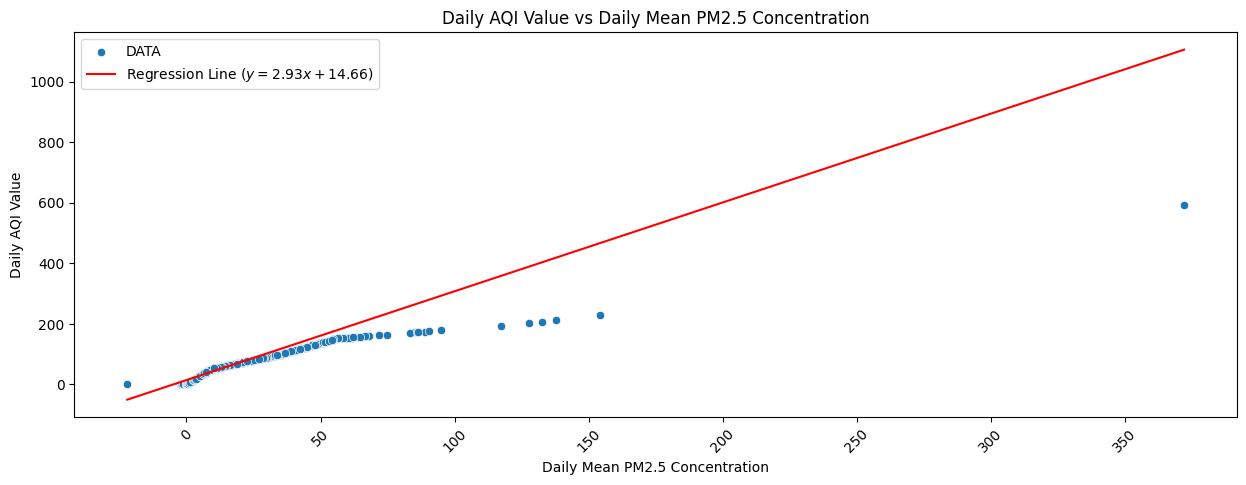

In [ ]:

import matplotlib.colors as mcolor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



X = df[['Daily Mean PM2.5 Concentration']].values

#x = np.sort(x)
y = df['Daily AQI Value'].values
#y = np.sort(y)
plt.figure(figsize=[15,5])
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

sns.scatterplot(x='Daily Mean PM2.5 Concentration', y='Daily AQI Value', data=df,  label='DATA')
m, b = np.polyfit(X.flatten(), y.flatten(), 1)
sns.lineplot(x=df['Daily Mean PM2.5 Concentration'], y=y_pred, color='red', label='Regression Line'+ ' (' +f'$y = {m:.2f}x {b:+.2f}$'+ ')')

print("r2 = {}, m = {}, b = {}".format(r2, m, b))

plt.xlabel('Daily Mean PM2.5 Concentration')
plt.ylabel('Daily AQI Value')
plt.title('Daily AQI Value vs Daily Mean PM2.5 Concentration')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Comparing Two Years of Data

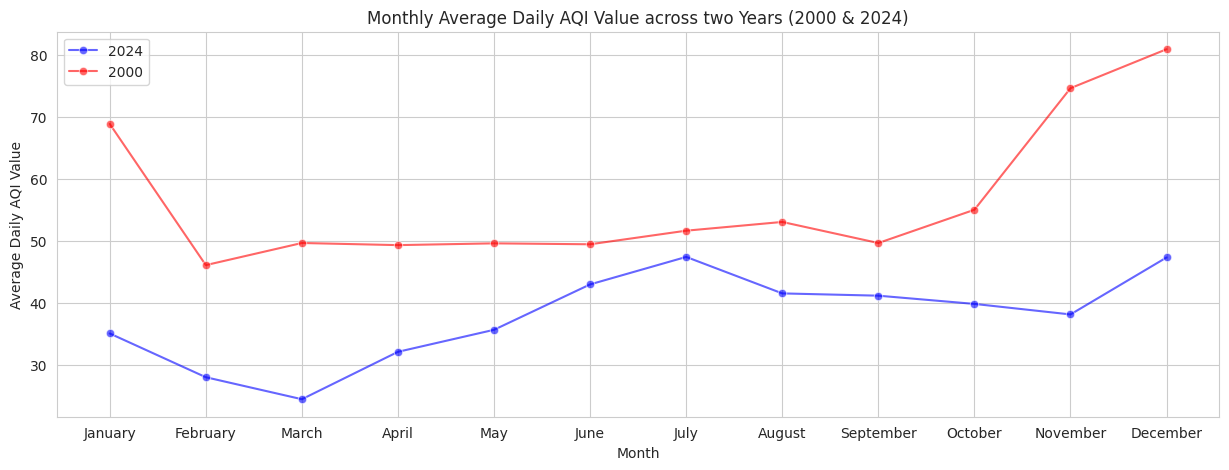

In [ ]:
# Checking Dataset 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('ad_viz_plotval_data.csv')
df1 = df1.dropna()
df1['Date'] = pd.to_datetime(df1['Date'])

df1['month'] =  pd.DatetimeIndex(df1['Date']).month
df1_1 =  df1.groupby(df1['month'])['Daily AQI Value'].mean().reset_index(name ='Avg_DAV')
x_1 = df1_1['month']
y_1 = df1_1['Avg_DAV']


df2 = pd.read_csv('ad_viz_plotval_data_2000.csv')
df2 = df2.dropna()
df2['Date'] = pd.to_datetime(df2['Date'])


df2['month'] = pd.DatetimeIndex(df2['Date']).month
df1_2 =  df2.groupby(df2['month'])['Daily AQI Value'].mean().reset_index(name ='Avg_DAV')
x = df1_2['month']
y = df1_2['Avg_DAV']



plt.figure(figsize=[15,5])
sns.set_style("whitegrid")
sns.lineplot(x='month', y='Avg_DAV', data=df1_1, marker='o', color = 'blue', label='2024', alpha=0.6)

sns.lineplot(x='month', y='Avg_DAV', data=df1_2, marker='o', color = 'red', label='2000', alpha=0.6)
plt.xlabel('Month')
plt.ylabel('Average Daily AQI Value')
plt.title('Monthly Average Daily AQI Value across two Years (2000 & 2024)')
plt.xticks(ticks=range(1,13), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.legend()
plt.show()

# Graphing CO

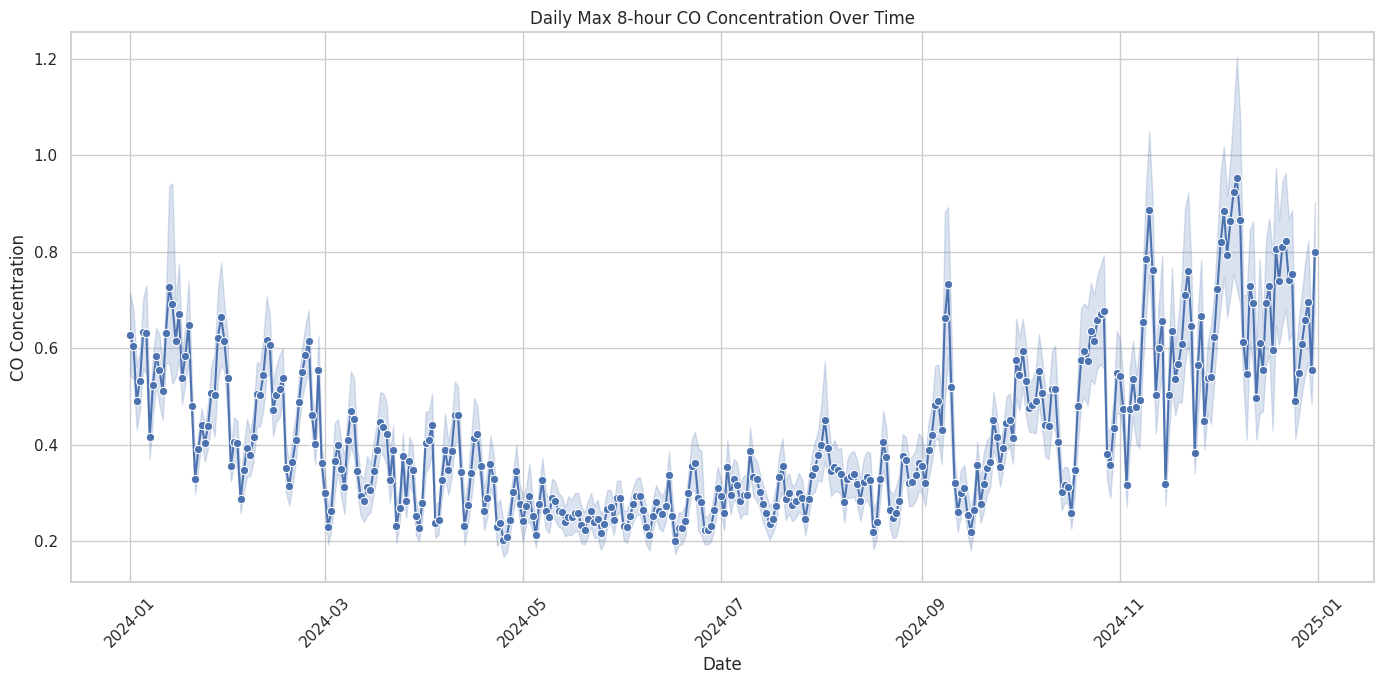

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_no2_2024_ma = pd.read_csv('ad_viz_plotval_data_co2.csv')
df_no2_2024_ma['Date'] = pd.to_datetime(df_no2_2024_ma['Date'])

sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Daily Max 8-hour CO Concentration', data=df_no2_2024_ma, marker='o')
plt.title('Daily Max 8-hour CO Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('CO Concentration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graphing No2

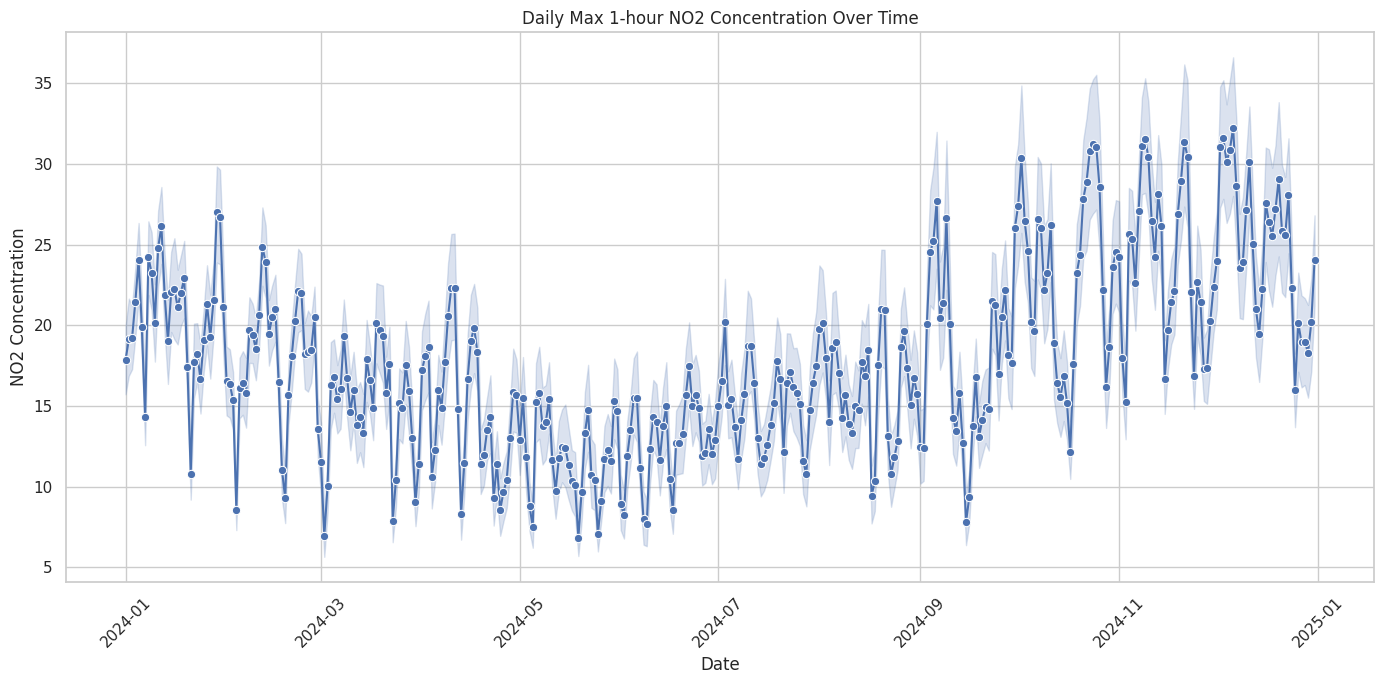

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_no2_2024_ma = pd.read_csv('ad_viz_plotval_data_no2.csv')
df_no2_2024_ma['Date'] = pd.to_datetime(df_no2_2024_ma['Date'], format="%m/%d/%Y")

sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Daily Max 1-hour NO2 Concentration', data=df_no2_2024_ma, marker='o')
plt.title('Daily Max 1-hour NO2 Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('NO2 Concentration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()